In [3]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [4]:
radius = 1
densityS = 7870
densityL = 1420
g = 9.82
startV = 1
deltaT = 0.25
endT = 10


r = 90 * radius
volumeS = (4/3) * (math.pi * radius ** 3)
massS = densityS * volumeS

In [5]:
def calcFres(tempFg, tempFl, tempFv):
    return tempFg - tempFl - tempFv

def calcFg(tempMass, tempG):
    return tempMass * tempG

def calcFl(tempDensity, tempVolume, tempG):
    return tempDensity * tempVolume * tempG

def calcFv(tempR, tempV):
    return tempR * tempV

def calcAccel(tempF, tempM):
    """Calculating the accelleration from force and mass"""
    return tempF/tempM

In [6]:
yPositions = np.array([0])
timeArray = np.array([0])
velocityArray = np.array([startV])

In [7]:
y = 0
v = startV
Fg = calcFg(massS, g)
Fl = calcFl(densityL, volumeS, g) 
Fv = calcFv(r,v)
Fres = calcFres(Fg, Fl, Fv)
print(Fres)
a = calcAccel(Fres, massS)
print(a)
t = 0

while (t <= endT):
    t = t + deltaT
    timeArray = np.concatenate((timeArray, np.array([t])))
    
    v = v + a * deltaT
    velocityArray = np.concatenate((velocityArray, np.array([Fres])))
    
    y = y + v * deltaT
    
    yPositions = np.concatenate((yPositions, np.array([y])))
    
    Fv = calcFv(r,v)
    Fres = calcFres(Fg, Fl, Fv)
    a = calcAccel(Fres, massS)
    

265223.7827809652
8.045427456503507


<function matplotlib.pyplot.show(close=None, block=None)>

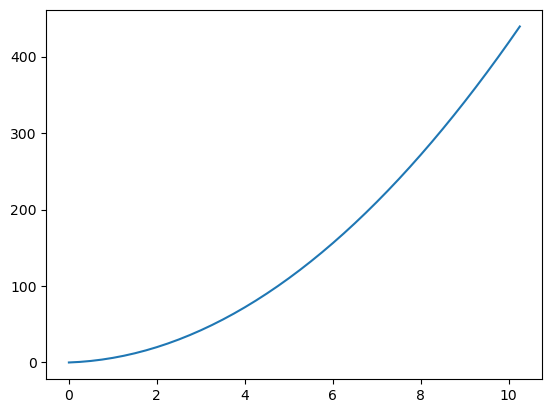

In [8]:
plt.plot(timeArray, yPositions)
plt.show

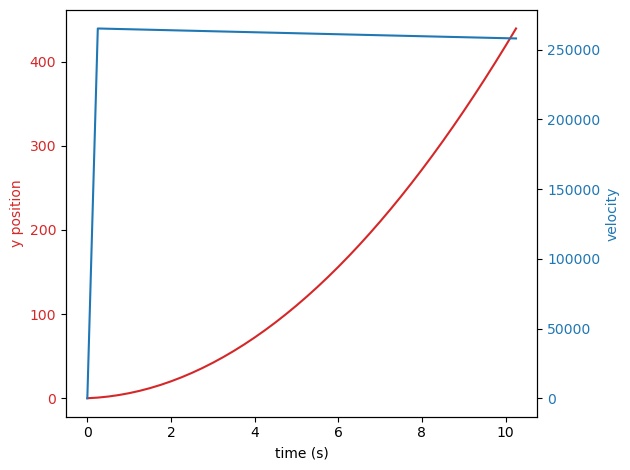

In [9]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('time (s)')
ax1.set_ylabel('y position', color=color)
ax1.plot(timeArray, yPositions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('velocity', color=color)  # we already handled the x-label with ax1
ax2.plot(timeArray, velocityArray, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

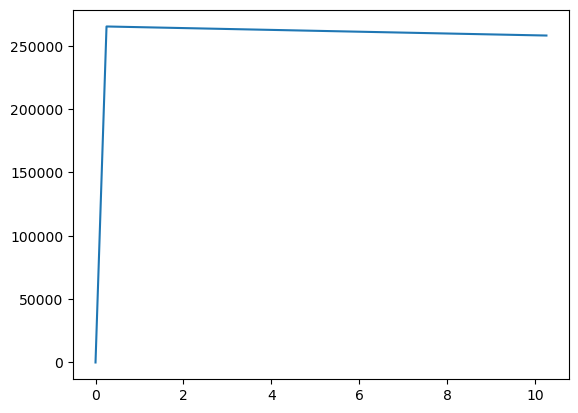

In [10]:
plt.plot(timeArray, velocityArray)
plt.show